Script to create noisy arteficial data 

In [4]:
# import libaries 
import numpy as np
import torch
from scipy.integrate import odeint

In [ ]:
def equation(y, t):
    #the equation is A <-> B+C and C<->D
    cA,cB,cC,cD=y  #array of concentrations
   

    k1 = 1    # kinetic constants of the chemical reactions
    k2 = 0.5
    k3 = 3
    k4 = 2


    f_0 = - k1 * cA + k2 * cB * cC                             #dA/dt
    f_1 = + k1 * cA - k2 * cB * cC                             #dB/dt
    f_2 = + k1 * cA - k2 * cB * cC - k3 * cC + k4 * cD         #dC/dt
    f_3 = + k3 * cC - k4 * cD                                  #dD/dt

    return (f_1,f_2,f_3,f_0)



In [ ]:
y0 = [ 8, 1, 0.5, 4 ] #initial concentrations
t = np.linspace(0, 10, 101)         #time
Conc= odeint(equation, y0,t)

/tmp/ipykernel_17106/1446810986.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


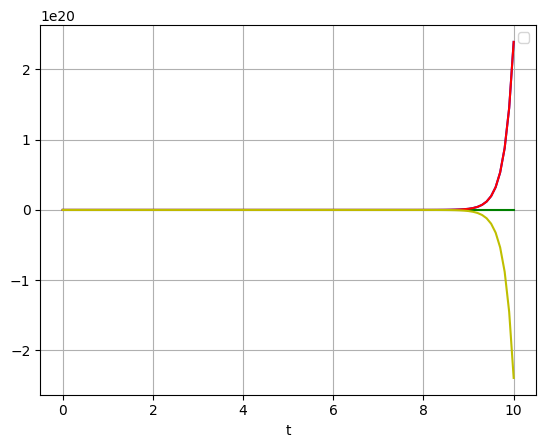

In [45]:
import matplotlib.pyplot as plt
plt.plot(t, Conc[:, 0], 'b')
plt.plot(t, Conc[:, 1], 'g')
plt.plot(t, Conc[:, 2], 'r')
plt.plot(t, Conc[:, 3], 'y')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [ ]:
#Add noise
noise_std=0.5
num_points=(101,4)
Conc_noise = Conc + np.random.normal(0, noise_std,num_points)



[[ 8.00000000e+00  1.00000000e+00  5.00000000e-01  4.00000000e+00]
 [ 8.82996394e+00  2.49851617e+00 -1.68552229e-01  3.17003606e+00]
 [ 9.85236897e+00  4.21104518e+00 -8.58676206e-01  2.14763103e+00]
 [ 1.12179375e+01  6.23493989e+00 -1.51700241e+00  7.82062513e-01]
 [ 1.30977060e+01  8.63110193e+00 -2.03339595e+00 -1.09770598e+00]
 [ 1.56087159e+01  1.13316799e+01 -2.22296402e+00 -3.60871585e+00]
 [ 1.86372343e+01  1.39671571e+01 -1.82992281e+00 -6.63723428e+00]
 [ 2.16073434e+01  1.56903805e+01 -5.83037032e-01 -9.60734345e+00]
 [ 2.35127406e+01  1.53172490e+01  1.69549167e+00 -1.15127406e+01]
 [ 2.36460412e+01  1.21230812e+01  5.02295995e+00 -1.16460412e+01]
 [ 2.26607497e+01  6.76821189e+00  9.39253783e+00 -1.06607497e+01]
 [ 2.27018719e+01  1.07791913e+00  1.51239528e+01 -1.07018719e+01]
 [ 2.64502469e+01 -3.27948787e+00  2.32297347e+01 -1.44502469e+01]
 [ 3.64235769e+01 -5.76411246e+00  3.56876893e+01 -2.44235769e+01]
 [ 5.53871849e+01 -6.87582526e+00  5.57630101e+01 -4.33871849e